In [3]:
# import necessary packages
import numpy as np  
import re  
import nltk
import pandas as pd
import pickle
nltk.download('stopwords')  
import pickle  
import seaborn as sn
from nltk.corpus import stopwords  
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

[nltk_data] Downloading package stopwords to /home/mohamed-
[nltk_data]     mossad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
#read the dataset
dataset=pd.read_csv('dataset/processed/clean-text.csv')
dataset.drop(['Unnamed: 0'],axis=1,inplace=True)
NO_OF_CLASSES=3 # 3 sentiment
dataset.head()

,airline_sentiment,text
0,neutral,what said
1,positive,plus you ve added commercials to the experien...
2,neutral,i didn t today must mean i need to take anoth...
3,negative,it s really aggressive to blast obnoxious ent...
4,negative,and it s a really big bad thing about it


In [5]:
# text preprocessing
# stemming
documents = []
stemmer = WordNetLemmatizer()
for i in range(len(dataset['text'])):
    # Lemmatization
    document = dataset['text'][i].split()
    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    documents.append(document)
documents[:10] # show sample of preprocessed text

['what said',
 u'plus you ve added commercial to the experience tacky',
 'i didn t today must mean i need to take another trip',
 u'it s really aggressive to blast obnoxious entertainment in your guest face amp they have little recourse',
 'and it s a really big bad thing about it',
 u'seriously would pay 30 a flight for seat that didn t have this playing it s really the only bad thing about flying va',
 'yes nearly every time i fly vx this ear worm won t go away',
 u'really missed a prime opportunity for men without hat parody there',
 'well i didn t but now i do d',
 u'it wa amazing and arrived an hour early you re too good to me']

In [6]:
# data preprocrssing convert text into numeric values using tf-idf vectorizer
tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))  
X = tfidfconverter.fit_transform(documents).toarray()
y=dataset['airline_sentiment'].values

In [7]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
# model training
text_classifier = RandomForestClassifier()
text_classifier.fit(X_train, y_train) 
predictions = text_classifier.predict(X_test)

/home/mohamed-mossad/.local/lib/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


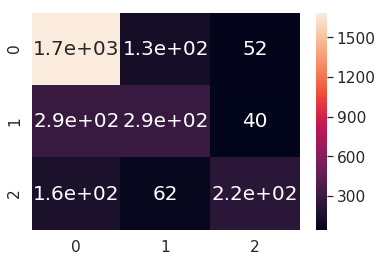

In [9]:
# confusion matrix 
df_cm = pd.DataFrame(confusion_matrix(y_test, predictions), range(NO_OF_CLASSES),
                  range(NO_OF_CLASSES))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 20})

In [10]:
print("Classification Report :\n {} \n Model Acurracy = {}".format(classification_report(y_test,predictions),
                                                                 accuracy_score(y_test, predictions)))

Classification Report :
               precision    recall  f1-score   support

    negative       0.79      0.90      0.84      1870
     neutral       0.60      0.47      0.52       614
    positive       0.71      0.50      0.58       444

   micro avg       0.75      0.75      0.75      2928
   macro avg       0.70      0.62      0.65      2928
weighted avg       0.74      0.75      0.74      2928
 
 Model Acurracy = 0.748975409836


In [12]:
# Save model in the current working directory
pkl_filename = "classifier.pkl"  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(text_classifier, file)
print("Model Saved")

Model Saved
